# IMDb Movie Rating Analysis 

The data have 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. Analysing this movie data to find some interesting insights into these movies and their voters.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
movies=pd.read_csv('Movie+Assignment+Data.csv')
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [2]:
movies.shape

(100, 62)

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [4]:
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


In [5]:
#to check null value

movies.isnull().sum()

Title             0
title_year        0
budget            0
Gross             0
actor_1_name      0
                 ..
Votes1000         0
VotesUS           0
VotesnUS          0
content_rating    0
Country           0
Length: 62, dtype: int64

In [6]:
#convert the unit of the budget and gross columns from $ to million $

movies['budget']= movies["budget"]/1000000
movies['Gross']= movies["Gross"]/1000000
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


In [7]:
#Top 10 profitable movies

movies['profit']=movies['Gross']- movies['budget']
movies= movies.sort_values('profit', ascending= False)
movies.iloc[:10,:]

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367


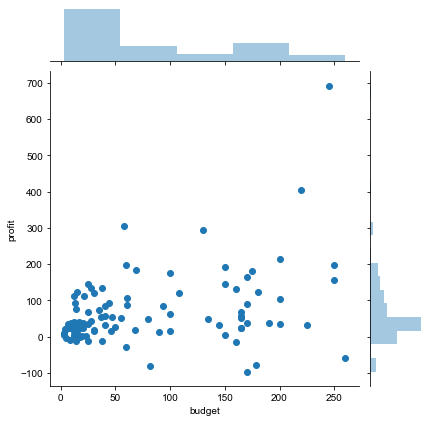

In [8]:
#Plot profit vs budget

sns.jointplot("budget","profit",movies)
sns.set_style('dark')

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses.Lets have a closer look at this by finding the movies with negative profit.

In [9]:
#the movies with negative profit

movies[movies["profit"]<0]

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


# The General Audience and the Critics

In [10]:
movies.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'profit'],
      dtype='object')

In [11]:
#MetaCritic and IMDb_rating are rating of movies. IMDb_rating score is on scale of 10 whereas MetaCritic is on scale of 100.
#so converting metacritic into scale of 10

movies['MetaCritic']= movies['MetaCritic']/10

In [12]:
#to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall.
#creating a column calculating average rating for MetaCritic and IMDb_rating

movies['Avg_rating']= movies['IMDb_rating']+movies['MetaCritic']/2
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,12.15
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,11.55
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,11.25
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,11.40
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,12.90


In [13]:
mov=movies[['Title','IMDb_rating','MetaCritic','Avg_rating']]
mov=mov.loc[abs(mov["IMDb_rating"]-mov["MetaCritic"]>0.5)]
mov = mov.sort_values("Avg_rating",ascending=False)
mov=mov.loc[mov["Avg_rating"]>=8]
mov

,Title,IMDb_rating,MetaCritic,Avg_rating
27,Inception,8.8,7.4,12.50
8,The Dark Knight Rises,8.4,7.8,12.30
26,Interstellar,8.6,7.4,12.30
36,The Wolf of Wall Street,8.2,7.5,11.95
56,Rush,8.1,7.5,11.85
50,Prisoners,8.1,7.4,11.80
24,How to Train Your Dragon,8.1,7.4,11.80
81,The Imitation Game,8.1,7.3,11.75
66,Warrior,8.2,7.1,11.75
14,X-Men: Days of Future Past,8.0,7.4,11.70


# Find the Most Popular Trios - I

A producer looking to make a blockbuster movie. There will primarily be three lead roles in the movie and he wish to cast the most popular actors for it. He doesnt want to take risk, so he wants to cast a trio which has already acted in together in a movie before. 

The metric that has chosen to check the popularity is the Facebook likes of each of these actors.
viz. actor_1_facebook_likes, actor_2_facebook_likes, and actor_3_facebook_likes. 

Objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of actor_1_facebook_likes, actor_2_facebook_likes and actor_3_facebook_likes should be maximum. 

Find out the top 5 popular trios, and output their names in a list.


In [14]:
group=movies.pivot_table(values=["actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes"],aggfunc="sum",
                         index=['actor_1_name','actor_2_name',"actor_3_name"])
group

actor_1_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                          10000   
Albert Finney Helen McCrory   Rory Kinnear                             883   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                         559   
Amy Adams     Jeremy Renner   Forest Whitaker                        35000   
Amy Poehler   Mindy Kaling    Phyllis Smith                           1000   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               15000   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           27000   
              Christian Bale  Joseph Gordon-Levitt                   27000   
              Frank Grillo    Kevin Dunn                             27000   
Tom Hughes    Tom Hollander   Lindsay Duncan                           565   

                                                    actor_2_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                         1944.0   
Albert Finney Helen McCrory   Rory Kinnear                           563.0   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       427.0   
Amy Adams     Jeremy Renner   Forest Whitaker                       5300.0   
Amy Poehler   Mindy Kaling    Phyllis Smith                          767.0   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               535.0   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                          9000.0   
              Christian Bale  Joseph Gordon-Levitt                 23000.0   
              Frank Grillo    Kevin Dunn                             798.0   
Tom Hughes    Tom Hollander   Lindsay Duncan                         555.0   

                                                    actor_3_facebook_likes  
actor_1_name  actor_2_name    actor_3_name                                  
Aidan Turner  Adam Brown      James Nesbitt                         1546.0  
Albert Finney Helen McCrory   Rory Kinnear                           393.0  
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       303.0  
Amy Adams     Jeremy Renner   Forest Whitaker                          0.0  
Amy Poehler   Mindy Kaling    Phyllis Smith                          384.0  
...                                                                    ...  
Tom Hanks     Mark Rylance    Amy Ryan                               423.0  
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           943.0  
              Christian Bale  Joseph Gordon-Levitt                 23000.0  
              Frank Grillo    Kevin Dunn                             581.0  
Tom Hughes    Tom Hollander   Lindsay Duncan                         171.0  

[99 rows x 3 columns]

In [15]:
group["Total likes"] = group["actor_1_facebook_likes"] + group["actor_2_facebook_likes"] + group["actor_3_facebook_likes"]
group

actor_1_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                          10000   
Albert Finney Helen McCrory   Rory Kinnear                             883   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                         559   
Amy Adams     Jeremy Renner   Forest Whitaker                        35000   
Amy Poehler   Mindy Kaling    Phyllis Smith                           1000   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               15000   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           27000   
              Christian Bale  Joseph Gordon-Levitt                   27000   
              Frank Grillo    Kevin Dunn                             27000   
Tom Hughes    Tom Hollander   Lindsay Duncan                           565   

                                                    actor_2_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                         1944.0   
Albert Finney Helen McCrory   Rory Kinnear                           563.0   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       427.0   
Amy Adams     Jeremy Renner   Forest Whitaker                       5300.0   
Amy Poehler   Mindy Kaling    Phyllis Smith                          767.0   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               535.0   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                          9000.0   
              Christian Bale  Joseph Gordon-Levitt                 23000.0   
              Frank Grillo    Kevin Dunn                             798.0   
Tom Hughes    Tom Hollander   Lindsay Duncan                         555.0   

                                                    actor_3_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                         1546.0   
Albert Finney Helen McCrory   Rory Kinnear                           393.0   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       303.0   
Amy Adams     Jeremy Renner   Forest Whitaker                          0.0   
Amy Poehler   Mindy Kaling    Phyllis Smith                          384.0   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               423.0   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           943.0   
              Christian Bale  Joseph Gordon-Levitt                 23000.0   
              Frank Grillo    Kevin Dunn                             581.0   
Tom Hughes    Tom Hollander   Lindsay Duncan                         171.0   

                                                    Total likes  
actor_1_name  actor_2_name    actor_3_name                       
Aidan Turner  Adam Brown      James Nesbitt             13490.0  
Albert Finney Helen McCrory   Rory Kinnear               1839.0  
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor           1289.0  
Amy Adams     Jeremy Renner   Forest Whitaker           40300.0  
Amy Poehler   Mindy Kaling    Phyllis Smith              2151.0  
...                                                         ...  
Tom Hanks     Mark Rylance    Amy Ryan                  15958.0  
Tom Hardy     Charlize Theron ZoÃ« Kravitz              36943.0  
              Christian Bale  Joseph Gordon-Levitt      73000.0  
              Frank Grillo    Kevin Dunn                28379.0  
Tom Hughes    Tom Hollander   Lindsay Duncan             1291.0  

[99 rows x 4 columns]

In [16]:
group=group.sort_values(by=["Total likes"], ascending=False)
group

,,,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total likes
actor_1_name,actor_2_name,actor_3_name,,,,
Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0
...,...,...,...,...,...,...
Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,550.0
Elina Alminas,Sonoya Mizuno,Corey Johnson,149,145.0,123.0,417.0
Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,251.0


In [17]:
group.reset_index(inplace= True)

In [18]:
#top 5 popular trios

group=group.iloc[0:5,:]
group

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total likes
0,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0


# Find the Most Popular Trios - II

Trios II with The condition, none of the three actors' Facebook likes should be less than half of the other two.

For example,

the following is a valid combo:

●	actor_1_facebook_likes: 70000
●	actor_2_facebook_likes: 40000
●	actor_3_facebook_likes: 50000
But the below one is not:

●	actor_1_facebook_likes: 70000
●	actor_2_facebook_likes: 40000
●	actor_3_facebook_likes: 30000

since in this case, actor_3_facebook_likes is 30000, which is less than half of actor_1_facebook_likes.
Having this condition ensures that you aren't getting any unpopular actor in your trio 

The most popular trio after applying the condition above


In [19]:
j=0
for i in group["Total likes"]:
    temp=sorted([group.loc[j,"actor_1_facebook_likes"],group.loc[j,"actor_2_facebook_likes"],group.loc[j,"actor_3_facebook_likes"]])
    if temp[0]>= temp[1]/2 and temp[0]>=temp[2]/2 and temp[1]>=temp[2]/2:
        print(sorted([group.loc[j,"actor_1_name"],group.loc[j,"actor_2_name"],group.loc[j,"actor_3_name"]]))

    j=j+1

['Joseph Gordon-Levitt', 'Leonardo DiCaprio', 'Tom Hardy']
['Hugh Jackman', 'Jennifer Lawrence', 'Peter Dinklage']
['Christian Bale', 'Joseph Gordon-Levitt', 'Tom Hardy']


# Runtime Analysis

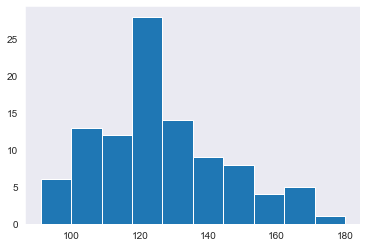

In [20]:
# Runtime histogram/density plot

plt.hist(movies["Runtime"])
plt.show()

Most of the movies run sharp 2 hours. only few movies run 3 hours where as number of movies run more than 2 hours is more 

# R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.CVotesU18 from the movies dataframe. Store these in a dataframe named PopularR.

In [21]:
movies.loc[movies["content_rating"]=="R"].sort_values(by="CVotesU18",ascending=False)[["Title","CVotesU18"]].head(10)


,Title,CVotesU18
47,Deadpool,4598
36,The Wolf of Wall Street,3622
35,Django Unchained,3250
29,Mad Max: Fury Road,3159
95,Whiplash,2878
31,The Revenant,2619
40,Shutter Island,2321
43,Gone Girl,2286
65,The Grand Budapest Hotel,2083
72,Birdman or (The Unexpected Virtue of Ignorance),1891


# Demographic analysis


Analyse the voters across all demographics and also see how these vary across various genres

In [22]:
# Create the dataframe df_by_genre

df_by_genre=movies.loc[:,"CVotes10":"VotesnUS"]
df_by_genre[["genre_1","genre_2","genre_3"]]=movies[["genre_1","genre_2","genre_3"]]
df_by_genre 

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,genre_1,genre_2,genre_3
97,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,Action,Adventure,Fantasy
11,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,Action,Sci-Fi,NaN
47,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,Action,Adventure,Comedy
32,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,Action,Adventure,Mystery
12,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,Animation,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47292,48976,79198,59689,28452,13451,6977,4254,3069,6287,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,Action,Comedy,Romance
7,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,Animation,Adventure,Comedy
17,60383,99596,175961,100724,28982,8145,2858,1368,857,1661,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,Action,Adventure,Sci-Fi
39,7565,7321,11668,8558,3370,1162,456,227,158,293,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,Animation,Adventure,Drama


In [23]:
# Create a column cnt and initialize it to 1
df_by_genre["cnt"]=1

In [24]:
# Group the movies by individual genres
df_by_g1=df_by_genre.groupby("genre_1").aggregate(np.sum)
df_by_g2=df_by_genre.groupby("genre_2").aggregate(np.sum)
df_by_g3=df_by_genre.groupby("genre_3").aggregate(np.sum)


In [25]:
df_by_g1

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,...,100.8,100.7,101.3,100.5,100.0,102.9,94.7,103.3,101.5,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,...,68.6,68.7,68.9,67.7,67.5,68.7,62.7,70.9,69.4,9
Crime,383290,690221,1083469,627593,206756,71460,30336,17190,11757,25839,...,69.4,69.7,68.8,68.7,68.6,69.6,66.3,71.9,70.1,9
Drama,1080725,1494053,1827363,1078966,417205,163874,75525,45846,32068,71464,...,139.3,139.0,139.7,137.7,137.2,138.7,130.0,143.2,141.1,18
Mystery,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,...,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,1


In [26]:
df_by_g2

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_2,,,,,,,,,,,,,,,,,,,,,
Action,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Adventure,2297820,2548864,3271725,2055600,758009,272735,113691,64623,44121,116937,...,171.0,170.4,173.9,169.2,168.4,172.8,162.7,176.4,171.6,22
Biography,185172,313178,576374,370003,119348,38643,14844,7974,5248,13828,...,38.3,38.2,38.5,38.0,37.9,38.8,35.4,39.4,38.4,5
Comedy,428995,624720,854162,512668,193916,76752,35193,20995,14798,30509,...,54.0,54.1,53.4,53.0,53.1,53.1,51.0,55.5,54.3,7
Crime,19576,40247,85359,64633,24920,8548,3261,1669,970,1689,...,7.5,7.6,7.2,7.6,7.6,7.4,7.2,7.8,7.6,1
Drama,1923492,2761237,4112363,2492241,853434,300100,124511,70205,49642,112896,...,270.2,270.4,270.1,267.9,267.1,271.8,253.4,278.2,272.6,35
Family,68937,54947,102488,80465,31205,11792,4808,2454,1617,4522,...,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,1
Fantasy,270616,290831,447307,291071,120920,47215,19848,10871,6885,14702,...,22.9,22.9,23.3,23.0,22.8,23.7,22.1,23.4,23.2,3
History,15757,32840,83322,63800,19183,5178,1657,735,419,878,...,7.5,7.5,7.5,7.7,7.6,7.9,7.4,7.7,7.5,1


In [27]:
df_by_g3

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_3,,,,,,,,,,,,,,,,,,,,,
Adventure,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Comedy,583404,653362,882294,559835,200937,68167,26488,14258,9307,24617,...,54.8,54.6,56.0,54.3,54.1,55.3,51.7,56.2,55.2,7
Crime,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,...,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,1
Drama,400221,680085,1167327,748493,258717,88338,35439,19075,12475,26948,...,91.8,91.7,92.0,91.2,91.0,92.7,86.1,94.5,92.3,12
Family,29228,40728,77893,62936,27932,11179,4664,2674,1700,3023,...,7.4,7.4,7.4,7.5,7.5,7.6,7.4,7.7,7.5,1
Fantasy,301836,311392,442460,308676,120911,46269,19555,11362,7808,24139,...,30.4,30.2,31.7,30.4,30.0,31.8,28.4,31.5,30.5,4
History,135504,227547,311209,159262,48678,16055,6307,3649,2729,8413,...,23.7,23.6,23.8,23.3,23.1,24.2,22.0,24.5,23.7,3
Music,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,...,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,1
Mystery,274446,443661,654167,375087,128131,44818,18755,10578,7149,17825,...,30.8,30.8,31.5,30.4,30.3,31.3,29.3,31.9,31.3,4


In [28]:
# Add the grouped data frames and store it in a new data frame
df_add=df_by_g1.add(df_by_g2,fill_value=0)
df_add=df_add.add(df_by_g3,fill_value=0)
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,7545.0,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,38841.0,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,9291.0,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [29]:
# Extract genres with atleast 10 occurences
genre_top_10=df_add.loc[df_add["cnt"]>10]
genre_top_10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [92]:
# Rounding off the columns of Votes to two decimals

genre_top_10.loc[:,"VotesM":"VotesnUS"]=round(genre_top_10.loc[:,"VotesM":"VotesnUS"],2)

In [91]:
# Converting CVotes to int type

genre_top_10[genre_top_10.loc[:,"CVotes10":"CVotesnUS"].columns]=genre_top_10[genre_top_10.loc[:,"CVotes10":"CVotesnUS"].columns].astype(int)

In [32]:
genre_top_10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467,3547429,4677755,2922126,1075354,393484,166970,95004,65573,171247,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659,4014192,5262328,3281981,1212075,438970,183070,103318,69737,173858,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003,1401608,2231078,1332980,425595,138648,53718,29510,20613,51297,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616,1774987,2506851,1591069,600287,226852,97469,56218,39391,88367,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526,967118,1419495,821390,278391,98690,42271,24713,16985,37217,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438,4935375,7107053,4319700,1529356,552312,235475,135126,94185,211308,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959,689492,1069280,712841,281289,110901,48913,27698,19200,40075,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284,2530855,3002994,1802098,671811,254175,111925,65904,46171,114435,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701,1465491,1993378,1175799,416046,149953,65281,37940,25767,57630,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


The final dataframe has complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

# Genre Counts

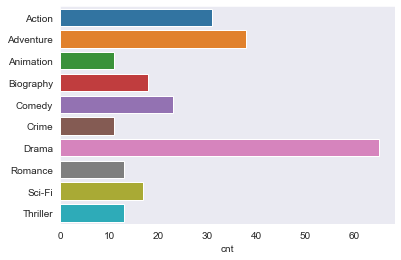

In [33]:
# Countplot for genres
sns.barplot(x=genre_top_10["cnt"],y=genre_top_10.index)
plt.show()

The genre "Drama" has count. More number of people like dramatic movies and there are few animation movie lovers.

# Gender and Genre

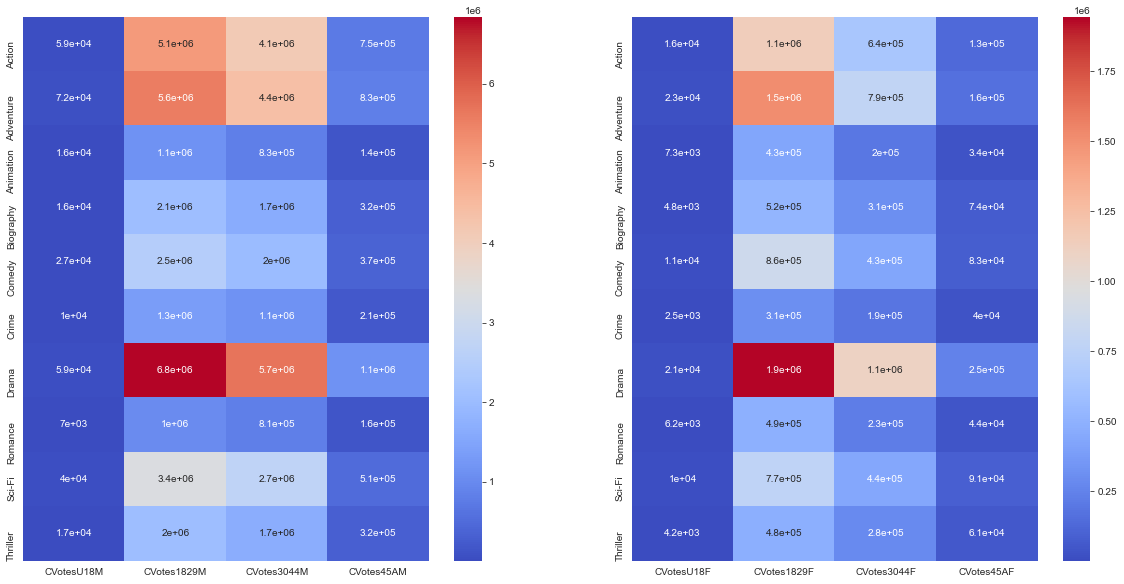

In [34]:
# 1st set of heat maps for CVotes-related columns
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.heatmap(genre_top_10[["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"]],annot=True,cmap="coolwarm")
plt.subplot(1,2,2)

ax=sns.heatmap(genre_top_10[["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"]],annot=True,cmap="coolwarm")
plt.show()

A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender.

Inference 1: Genre romance has got the least number of votes among any age group of males, but there is no such pattern among the females

Inference 2:Action seems to be the more popular genre among the under 18 males, and Animation appears to be the most popular genre among under 18 females.

Inference 3: 18-29 age group seems to be most actively voting for any genre irrespective of gender

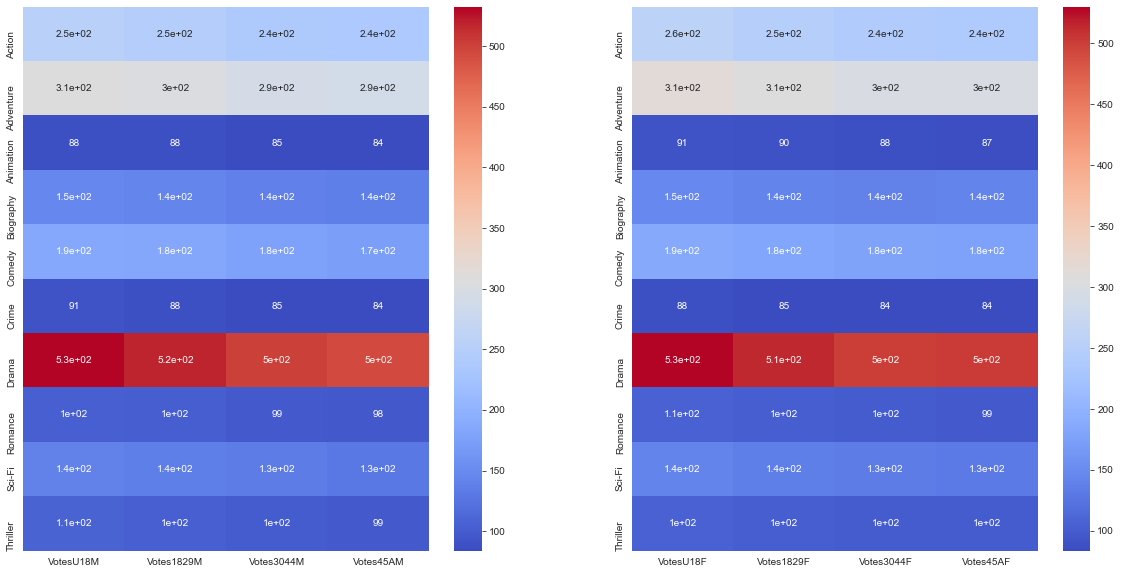

In [35]:
# 2nd set of heat maps for Votes-related columns

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.heatmap(genre_top_10[["VotesU18M","Votes1829M","Votes3044M","Votes45AM"]],annot=True,cmap="coolwarm")
plt.subplot(1,2,2)

ax=sns.heatmap(genre_top_10[["VotesU18F","Votes1829F","Votes3044F","Votes45AF"]],annot=True,cmap="coolwarm")
plt.show()

Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group.

Inference 1:Genre Drama has heighest votes for both gender (male and female) in all age groups.

Inference 2:Comparitively Animation and orima movies has least number of vote

Inference 3:Under18 age group seems to be most actively voting for any genre irrespective of gender 

# US vs non-US Cross Analysis

In [77]:
#to find column number 

list(movies.columns).index("Country")

61

In [78]:
list(movies.columns).index("IFUS")

64

In [79]:
# Creating IFUS column
movies['IFUS']=0
j=0
for i in movies['Country']:
    if movies.iloc[j,61]=="USA":     
        movies.iloc[j,64]="USA"
    else:
        movies.iloc[j,64]="non-USA"
    j=j+1
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,IFUS
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,12.15,USA
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,11.55,USA
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,11.25,USA
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,11.40,USA
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,12.90,USA


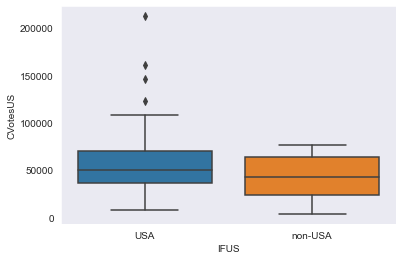

In [80]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

sns.boxplot(x="IFUS", y="CVotesUS", data=movies)

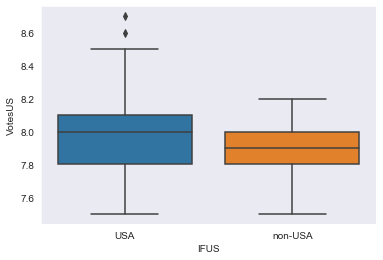

In [82]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

sns.boxplot(x="IFUS", y="VotesUS", data=movies)

# Top 1000 Voters Vs Genres 

In [86]:
# Sorting by CVotes1000

genre_top_10["CVotes1000"].sort_values(ascending= False)

Drama        38086
Adventure    25157
Action       21123
Comedy       13934
Sci-Fi       12146
Biography    10804
Thriller      8705
Romance       7130
Crime         6821
Animation     6364
Name: CVotes1000, dtype: int32

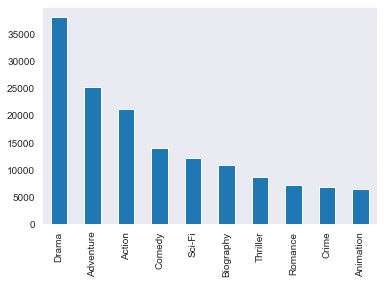

In [97]:
# barplot for genre vs CVotes1000

genre_top_10["CVotes1000"].sort_values(ascending= False).plot.bar()

# Inferences
From the top 1000 voters it is infered that genre such as Darama, Adventure, Action and Comedy movies are more likely watched and rated by people. Animation movies has least Cvotes 